<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Image__MLP%EB%A1%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%95%99%EC%8A%B5%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

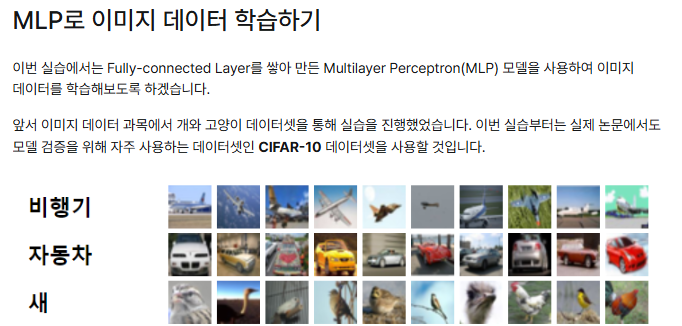

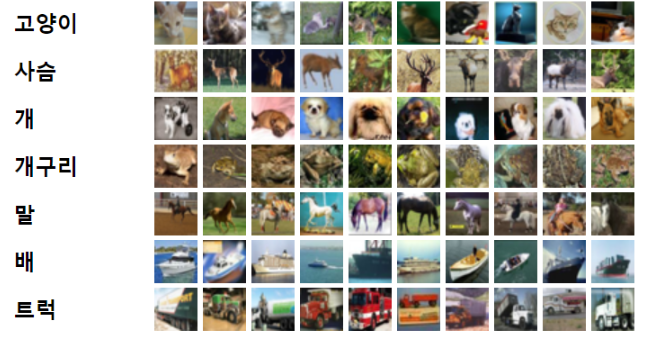

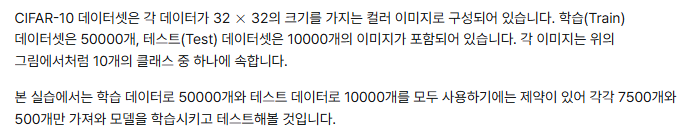

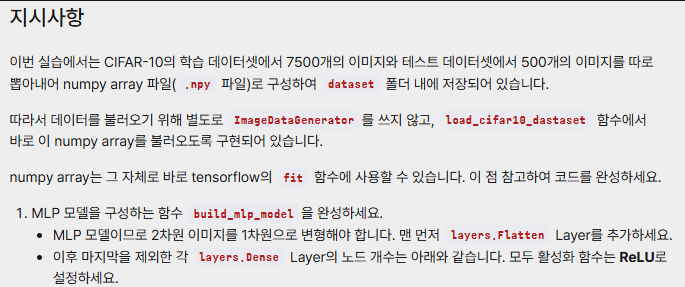

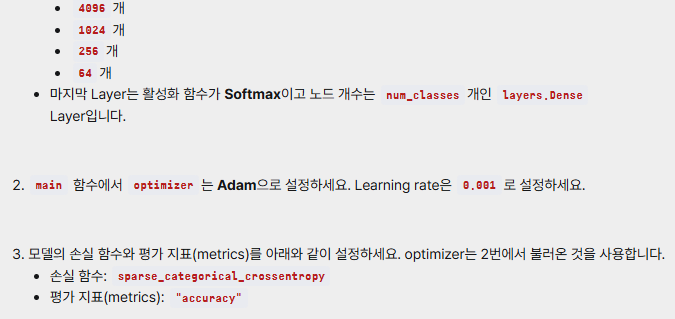

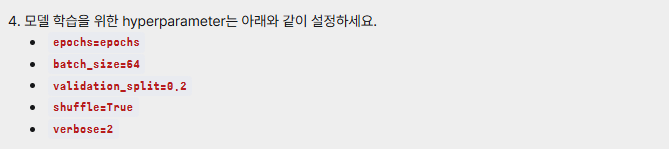

In [ ]:
from elice_utils import EliceUtils

elice_utils = EliceUtils()

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras import layers, Sequential, Input
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

SEED = 2021

def load_cifar10_dataset():
    train_X = np.load("./dataset/cifar10_train_X.npy")
    train_y = np.load("./dataset/cifar10_train_y.npy")
    test_X = np.load("./dataset/cifar10_test_X.npy")
    test_y = np.load("./dataset/cifar10_test_y.npy")

    train_X, test_X = train_X / 255.0, test_X / 255.0 # 255 는 이미지 픽셀 값의 범위 0~255 따라서 255로 나눠서 모든 픽셀 값을 0~1로 정규화 해주는 과정

    return train_X, train_y, test_X, test_y

def build_mlp_model(img_shape, num_classes=10):
    model = Sequential()

    model.add(Input(shape=img_shape)) # 모델의 첫 레이어, 모델에 들어올 이미지의 모양을 결정

    # TODO: [지시사항 1번] 모델을 완성하세요.
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation="relu")) # 처음에는 노드개수
    model.add(layers.Dense(1024, activation="relu"))
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(num_classes, activation="softmax")) # 마지막 레이어 분류를 위해 마지막 레이어는 클래스의 개수(각 클래스의 확률값이 되도록)

    return model

def plot_history(hist):
    train_loss = hist.history["loss"]
    train_acc = hist.history["accuracy"]
    valid_loss = hist.history["val_loss"]
    valid_acc = hist.history["val_accuracy"]

    fig = plt.figure(figsize=(8, 6))
    plt.plot(train_loss)
    plt.plot(valid_loss)
    plt.title('Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Train', 'Valid'], loc='upper right')
    plt.savefig("loss.png")
    elice_utils.send_image("loss.png")

    fig = plt.figure(figsize=(8, 6))
    plt.plot(train_acc)
    plt.plot(valid_acc)
    plt.title('Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['Train', 'Valid'], loc='upper left')
    plt.savefig("accuracy.png")
    elice_utils.send_image("accuracy.png")

def main(model=None, epochs=10):
    tf.random.set_seed(SEED)
    np.random.seed(SEED)

    train_X, train_y, test_X, test_y = load_cifar10_dataset()
    img_shape = train_X[0].shape

    # TODO: [지시사항 2번] Adam optimizer를 설정하세요.
    optimizer = Adam(learning_rate=0.001)

    mlp_model = model
    if model is None:
        mlp_model = build_mlp_model(img_shape)

    # TODO: [지시사항 3번] 모델의 optimizer, 손실 함수, 평가 지표를 설정하세요.
    mlp_model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

    # TODO: [지시사항 4번] 모델 학습을 위한 hyperparameter를 설정하세요.
    hist = mlp_model.fit(train_X, train_y, epochs=epochs, batch_size=64, validation_split=0.2, shuffle=True, verbose=2) # validation_split=0.2 는 8:2 로 train 데이터에서 validation 데이터를 나누겠다.

    plot_history(hist)
    test_loss, test_acc = mlp_model.evaluate(test_X, test_y)
    print("Test Loss: {:.5f}, Test Accuracy: {:.3f}%".format(test_loss, test_acc * 100))

    return optimizer, hist

if __name__ == "__main__":
    main()

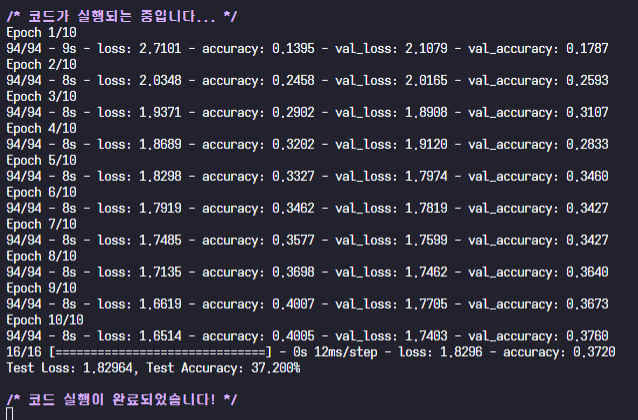

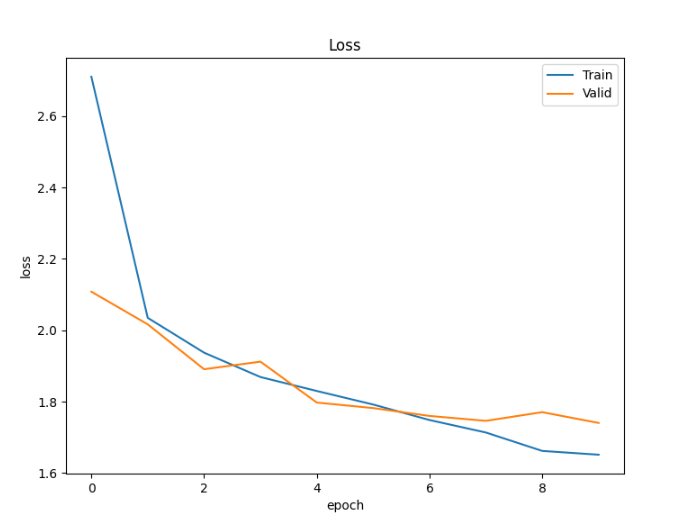

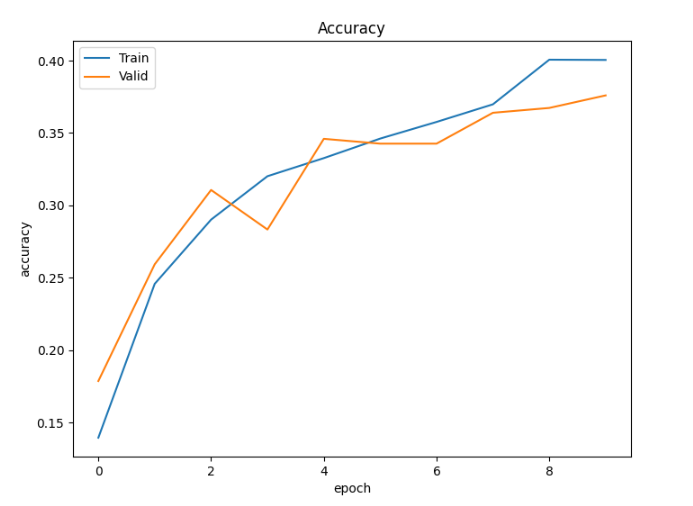